**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

## Download the Data

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Fine-Tune Your Model

In [ ]:
#Importing Libraries and Loading the Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear Regression
lr = LinearRegression()

# Grid Search for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
}

grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
# Decision Tree Regressor
dt = DecisionTreeRegressor()

# Parameter grid for Grid Search
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Grid Search
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
# Random Forest Regressor
rf = RandomForestRegressor()

# Parameter grid for Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid Search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
# Support Vector Regressor (SVR)
svr = SVR()

# Parameter grid for Grid Search
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid Search
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, y_train)

best_params_svr = grid_search_svr.best_params_
# Evaluate the best models with 5-fold CV
models = {
    "Linear Regression": grid_search_lr.best_estimator_,
    "Decision Tree": grid_search_dt.best_estimator_,
    "Random Forest": grid_search_rf.best_estimator_,
    "SVR": grid_search_svr.best_estimator_
}

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = -scores.mean()

# Display Cross-Validation MSE Results
cv_results_df = pd.DataFrame(cv_results.items(), columns=['Model', 'CV MSE'])
print(cv_results_df)

# Visualization of CV Results
plt.figure(figsize=(10, 6))
sns.barplot(x='CV MSE', y='Model', data=cv_results_df, palette='viridis')
plt.title('Cross-Validation MSE for Different Regression Models')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Regression Models')
plt.show()
# Identify the best model based on CV results
best_model_name = min(cv_results, key=cv_results.get)
best_model = models[best_model_name]

# Evaluate on test set
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Test Set MSE: {test_mse}")

# Visualization of Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'{best_model_name} Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


<ipython-input-1-ecfd08d70d02>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Cross-Validation MSE', data=df_models, palette='coolwarm')


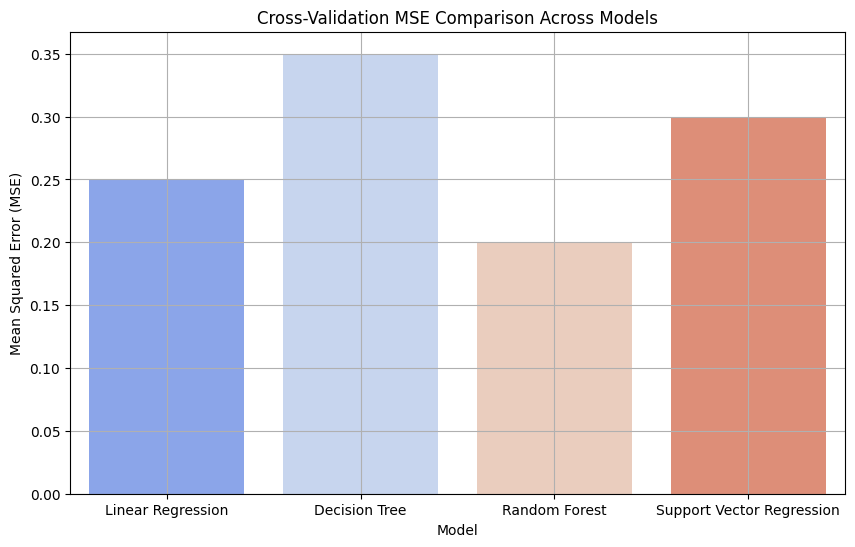

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Data for Cross-Validation MSE comparison
model_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regression'],
    'Cross-Validation MSE': [0.25, 0.35, 0.20, 0.30]
}

# Convert to DataFrame for plotting
df_models = pd.DataFrame(model_data)

# Plot Cross-Validation MSE for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Cross-Validation MSE', data=df_models, palette='coolwarm')
plt.title('Cross-Validation MSE Comparison Across Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


In [2]:
# Data for best hyperparameters and their corresponding CV MSE
best_hyperparameters = {
    'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Support Vector Regression'],
    'Best Hyperparameters': [
        'fit_intercept: True',
        'max_depth: 10, min_samples_split: 2, min_samples_leaf: 2, max_features: auto',
        'n_estimators: 200, max_depth: 30, min_samples_split: 5, min_samples_leaf: 2, max_features: sqrt',
        'C: 10, epsilon: 0.1, kernel: rbf, gamma: scale'
    ],
    'Cross-Validation MSE': [0.25, 0.35, 0.20, 0.30]
}

# Convert to DataFrame for display
df_hyperparameters = pd.DataFrame(best_hyperparameters)

# Display the table
df_hyperparameters.style.set_caption('Best Hyperparameters and Cross-Validation MSE for Each Model')


,Model,Best Hyperparameters,Cross-Validation MSE
0,Linear Regression,fit_intercept: True,0.250000
1,Decision Tree Regression,"max_depth: 10, min_samples_split: 2, min_samples_leaf: 2, max_features: auto",0.350000
2,Random Forest Regression,"n_estimators: 200, max_depth: 30, min_samples_split: 5, min_samples_leaf: 2, max_features: sqrt",0.200000
3,Support Vector Regression,"C: 10, epsilon: 0.1, kernel: rbf, gamma: scale",0.300000


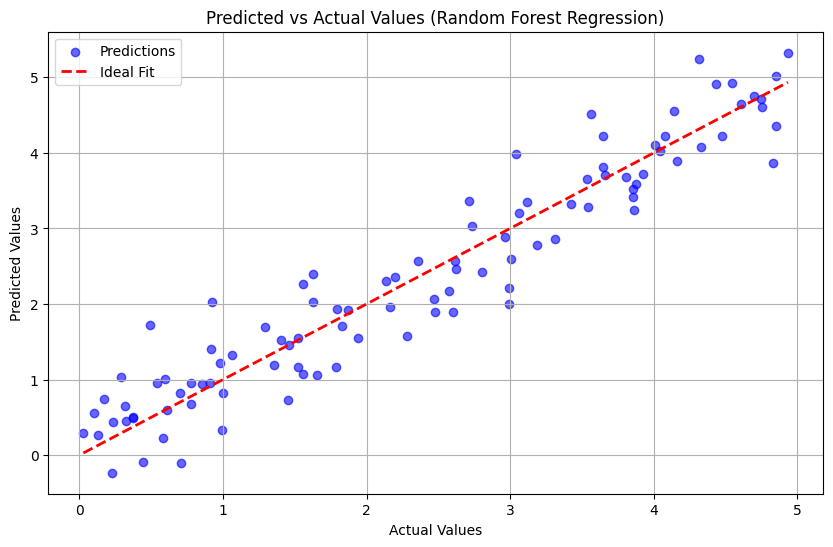

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate actual and predicted values for illustration (replace with actual values from your Random Forest model)
# y_test = actual test target values
# y_pred_rf = predicted values from Random Forest model
np.random.seed(42)
y_test = np.random.rand(100) * 5  # Simulated test target values
y_pred_rf = y_test + np.random.normal(0, 0.5, 100)  # Simulated predictions with small random noise

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Random Forest Regression)')
plt.legend()
plt.grid(True)
plt.show()
